In [1]:
import requests
from zipfile import ZipFile
from pathlib import Path

import os
import glob

import random as random
from PIL import Image

import torch
from torch import nn

from torch.utils.data import DataLoader
from torch.utils.data import Dataset

import torchvision
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

from torchvision import datasets
from torchvision import transforms

import torchmetrics
import mlxtend

import matplotlib.pyplot as plt

from typing import Tuple
from typing import Dict
from typing import List
from timeit import default_timer as timer
from matplotlib import patches as mpatches

from tqdm.auto import tqdm

import gc

from numba import cuda

from GPUtil import showUtilization as gpu_usage

import splitfolders

from torchinfo import summary

import shutil

import numpy as np
import pandas as pd
import yaml

from os import listdir                  
from os.path import isfile, join

In [2]:
def extract_data(zipfile_path: Path, destination_path: Path) -> None:
    '''Extracts zipfile'''
    
    if destination_path.is_dir():
        print(f"{destination_path} exists.")
    else:
        print(f"{destination_path} doesn't exist, creating one...")
        destination_path.mkdir(parents=True, exist_ok=True)

    if not os.listdir(destination_path):
        with ZipFile(zipfile_path, 'r') as zip:
            print("Extracting files...")
            zip.extractall(destination_path)

            print("Extracting finished.")
    else:
        print("Data already extracted.")

data_path = Path("dataset")
zipfile_path = data_path /"human-faces-with-labels.zip"
images_path = data_path / "human-faces-with-labels/Data/Images"
annotations_path=data_path / "human-faces-with-labels/Data/Labels"

extract_data(zipfile_path, images_path)

dataset/human-faces-with-labels/Data/Images exists.
Data already extracted.


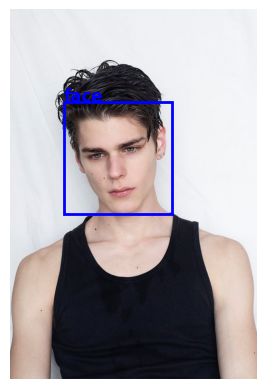

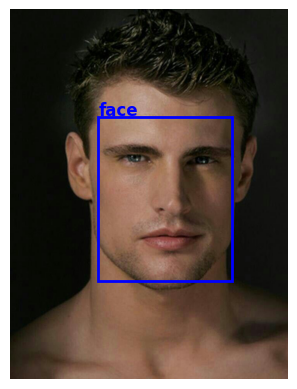

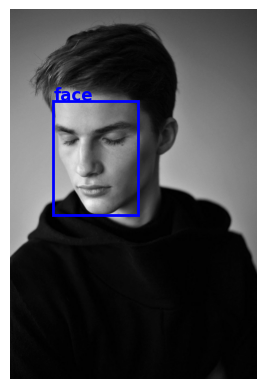

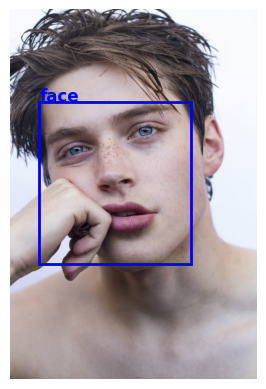

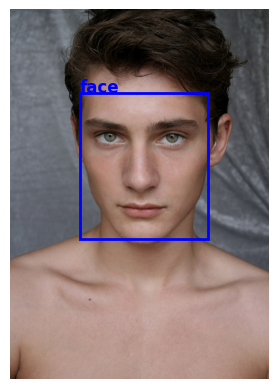

Copying files: 1582 files [00:00, 4066.26 files/s]

Moving files finished.


In [3]:
import random
from pathlib import Path
from os import listdir
from os.path import isfile, join
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def print_random_images(images_path: Path, annotations_path: Path, n: int = 5, seed=None) -> None:
    if n > 10:
        n = 10
    
    if seed:
        random.seed(seed)
    
    photos_list = [f for f in listdir(images_path) if isfile(join(images_path, f))]
    selected_photos = random.sample(photos_list, k=n)
    
    for photo_name in selected_photos:
        photo_path = images_path / photo_name
        annotation_file = annotations_path / (photo_name[:photo_name.index(".")] + '.txt')
        
        with Image.open(photo_path) as img:
            fig, ax = plt.subplots()
            ax.imshow(img)
            ax.axis(False)
            image_width, image_height = img.size
            
            with open(annotation_file) as f:
                label = f.read().strip()
            
            labels = list(map(float, label.split(" ")))
            x1, y1, width, height = labels[1:]
            
            bbox_x = x1 * image_width - width * image_width / 2
            bbox_y = y1 * image_height - height * image_height / 2
            bbox_width = width * image_width
            bbox_height = height * image_height
            
            rect = mpatches.Rectangle((bbox_x, bbox_y), bbox_width, bbox_height, linewidth=1, edgecolor='b', facecolor='none', lw=2)
            ax.add_patch(rect)
            
            ax.annotate('face', (bbox_x, bbox_y - 2), color='blue', weight='bold', fontsize=12, ha='left', va='baseline')
            
            plt.show()




# Example usage:
# images_path = data_path / "human-faces-with-labels/Data/Images"
images_path = Path('dataset/human-faces-with-labels/Data/Images')  # Replace with your images folder path
annotations_path = Path('dataset/human-faces-with-labels/Data/Labels')  # Replace with your annotations folder path
print_random_images(images_path, annotations_path)
input_folder = Path("dataset/human-faces-with-labels/Data")
output_folder = Path("dataset/Faces_detection_new")
splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=42,
    ratio=(0.8, 0.2),
    group_prefix=None
)
print("Moving files finished.")
with open("dataset/human-faces-with-labels/classes.txt") as f:
    classes = [classname.rstrip() for classname in f]

In [ ]:
import yaml
from timeit import default_timer as timer


# Define the YAML data
yaml_file = 'dataset/faces_v1.yaml'
yaml_data = dict(
    path="dataset/Faces_detection",  # Root path to dataset
    train="train/Images",  # Path to training images directory
    val="val/Images",  # Path to validation images directory
    nc=len(classes),  # Number of classes
    names=classes  # Class names
)

# Write YAML data to file
with open(yaml_file, 'w') as f:
    yaml.dump(yaml_data, f, explicit_start=True, default_flow_style=False)

# Start timer for training time measurement
start_time = timer()

# Command to run YOLOv5 training
!python train.py --workers 2 --img 640 --batch 8 --epochs 50 --data "dataset/faces_v1.yaml" --weights yolov5s.pt --device 0 --cache

# End timer
end_time = timer()

# Print training time
print(f'Training time: {(end_time - start_time):.2f} seconds')


In [3]:
import torch
model_yolo = torch.hub.load('ultralytics/yolov5', 'custom', path = 'runs/train/exp17/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/pardeep/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-7-8 Python-3.12.4 torch-2.3.1 CUDA:0 (NVIDIA GeForce GTX 1650, 3896MiB)

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [ ]:
import cv2
import tensorflow as tf
import requests
from zipfile import ZipFile
from pathlib import Path

import os
import glob

import random as random
from PIL import Image

import torch
from torch import nn

from torch.utils.data import DataLoader
from torch.utils.data import Dataset

import torchvision
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

from torchvision import datasets
from torchvision import transforms

import torchmetrics
import mlxtend

import matplotlib.pyplot as plt

from typing import Tuple
from typing import Dict
from typing import List
from timeit import default_timer as timer
from matplotlib import patches as mpatches

from tqdm.auto import tqdm

import gc

from numba import cuda

from GPUtil import showUtilization as gpu_usage

import splitfolders

from torchinfo import summary

import shutil

import numpy as np
import pandas as pd
import yaml

from os import listdir                  
from os.path import isfile, join
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# video = "3249935-uhd_3840_2160_25fps.mp4"
cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture(video)

## Create transform for images detected by yolo
test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

assert cap.isOpened()

## video loop
while(cap.isOpened()):
    ret, frame = cap.read()
    assert not isinstance(frame,type(None)), 'frame not found'
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)    
    results = model_yolo(frame)   
    print(results)
    frame = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
    
    labels, coordinates = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]
    width, height = frame.shape[1], frame.shape[0]
    print(labels, coordinates)
    for i in range(0, len(labels)):
        row = coordinates[i]
    #     # if row[4] >= 0.1: ## if yolo detects face with prob > 0.4
        x1, y1, x2, y2 = int(row[0]*width), int(row[1]*height), int(row[2]*width), int(row[3]*height) ## get x, y of the bbox
    #     face_crop = frame[int(y1):int(y2), int(x1):int(x2)] ## crop the face
    #     gray = cv2.cvtColor(face_crop, cv2.COLOR_BGR2GRAY)
    #     roi_gray = cv2.resize(gray, (48, 48))
    #     roi_gray = roi_gray.astype('float32') / 255.0
    #     roi_gray = np.expand_dims(roi_gray, axis=0)
    #     roi_gray = np.expand_dims(roi_gray, axis=0)
    #     transformed_image = torch.from_numpy(roi_gray).float().to(device)
    #     # transformed_image = (test_transform(face_crop)).unsqueeze_(0) ## create the transform of cropped imgae
    #     model = model.to(torch.device(device)) ## send model to device 
    #     transformed_image = transformed_image.to(torch.device(device)) ## send data to device
        
    #     pred_label = torch.max(model(transformed_image), 1) ## get pred label
    #     pred_class = val_data.classes[pred_label.indices.item()] ## get pred class
        
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2) ## create bbox rectangle
    #     cv2.putText(frame, f"{pred_class}", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3) ## create bbox text
            
    cv2.imshow('YOLO', frame) ## show frame
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()